In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.autograd as autograd
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from torch.autograd import Variable
from torch.utils.data import DataLoader
from generation.train.autoencoder import AutoEncoder, run_train, generate_new_signal
from generation.data.data_simulation import Nakagami
from generation.data.dataset_pytorch import SignalsDataset
from generation.train.vanila_gan import run_train, generate_new_signal

In [2]:
# Data params
SAMPLE_SIZE = 50
Q_LOWER = 0.001
Q_UPPER = 0.999
NU_MIN = 0.9
NU_MAX = 1.2
NU_STEP = 0.0001


nakagami = Nakagami(SAMPLE_SIZE, Q_LOWER, Q_UPPER)
nu_values = np.arange(NU_MIN, NU_MAX, NU_STEP)
data = nakagami.get_nakagami_data(nu_values)

In [3]:
LATENT_DIM = 100
BATCH_SIZE = 128
NUM_EPOCHS = 500
LEARNING_RATE = 1e-3
PRINT_EACH = 50
VERBOSE = 1
NO_SAVE = True
DEVICE = 'cuda'


dataset = SignalsDataset(data)

epoch-0; D_loss: 1.611494779586792; G_loss: 0.5287169218063354


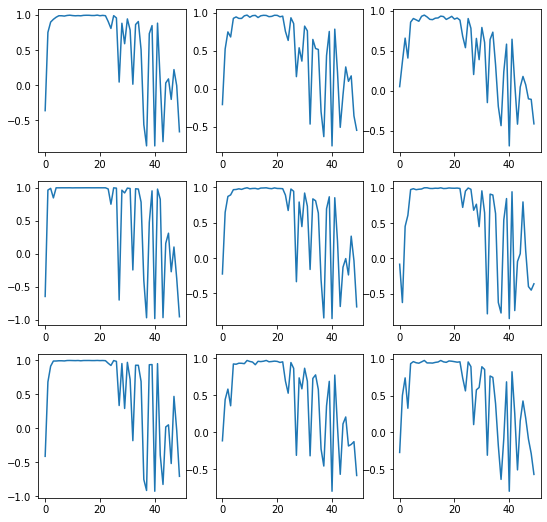

epoch-50; D_loss: 0.7650742530822754; G_loss: 2.961320161819458


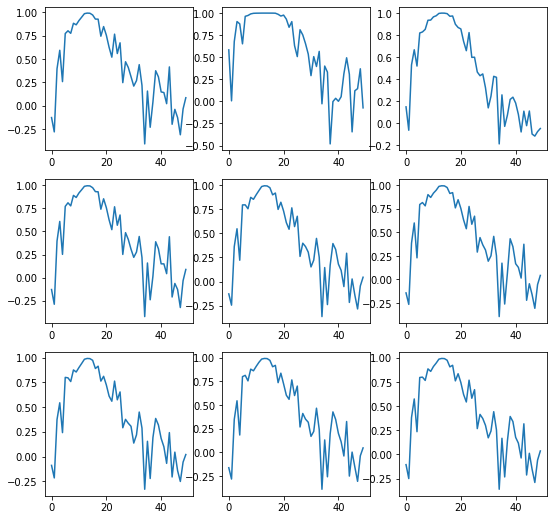

epoch-100; D_loss: 1.808628797531128; G_loss: 0.4956669807434082


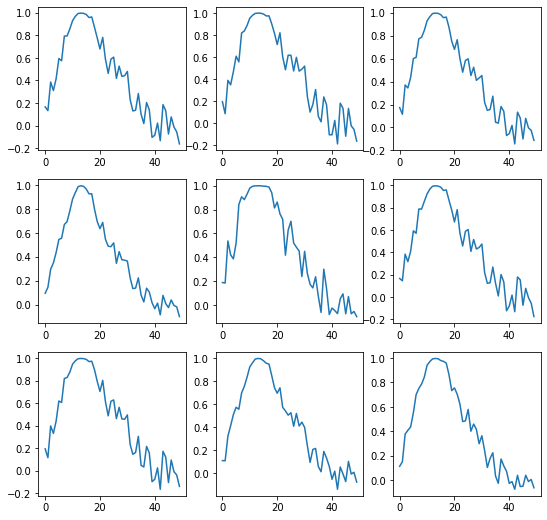

epoch-150; D_loss: 1.4259495735168457; G_loss: 0.7906146049499512


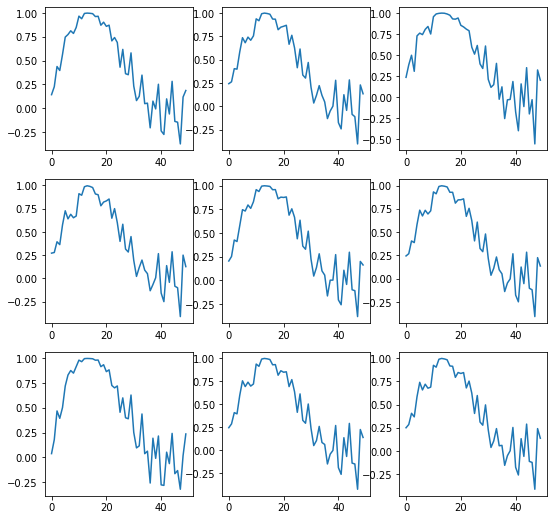

epoch-200; D_loss: 1.3990356922149658; G_loss: 1.414618968963623


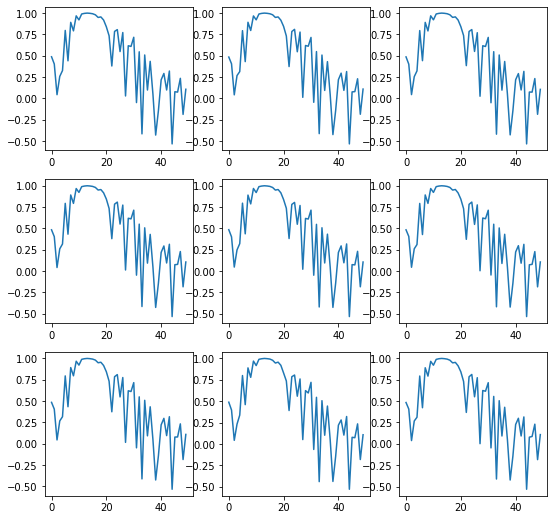

epoch-250; D_loss: 3.1027824878692627; G_loss: 0.3681376576423645


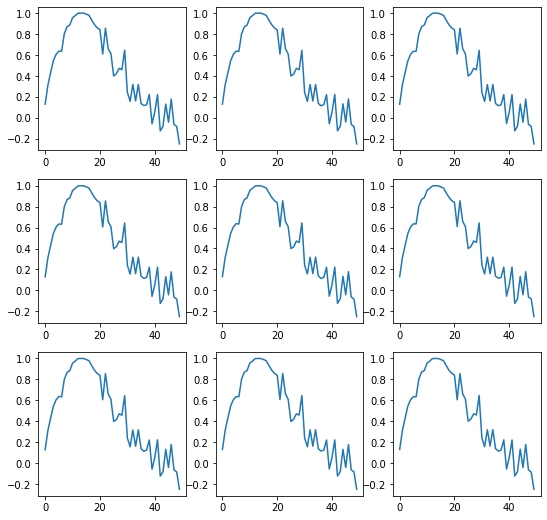

epoch-300; D_loss: 0.8616814613342285; G_loss: 1.0862559080123901


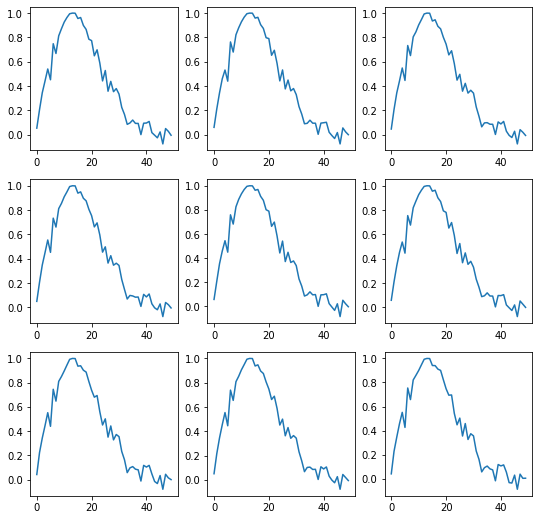

epoch-350; D_loss: 2.3952760696411133; G_loss: 0.3886559009552002


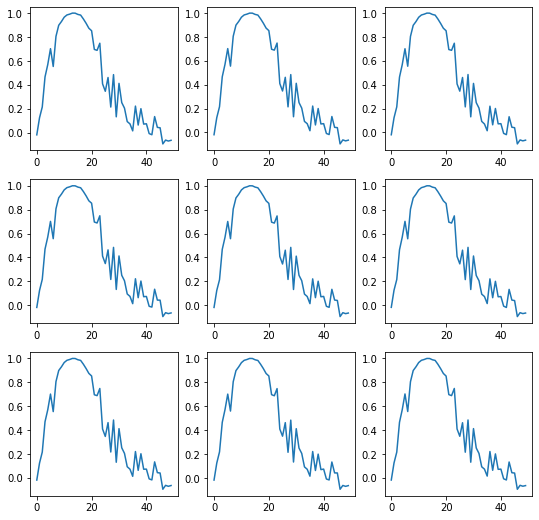

epoch-400; D_loss: 2.5359857082366943; G_loss: 0.44682577252388


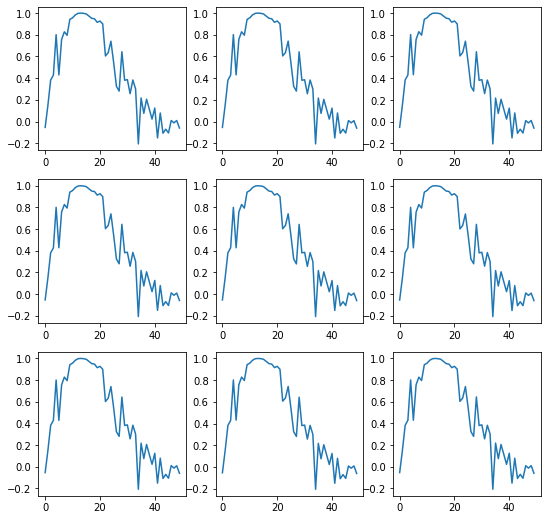

epoch-450; D_loss: 1.2739131450653076; G_loss: 0.7373477220535278


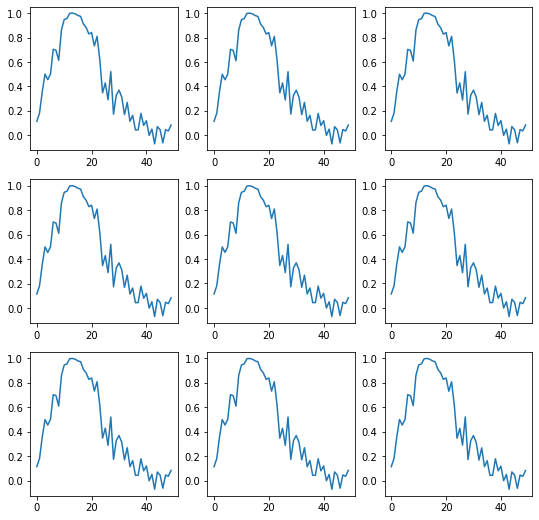

In [4]:
generator = run_train(dataset, \
          latent_dim=LATENT_DIM, \
          sample_size=SAMPLE_SIZE, \
          learning_rate=LEARNING_RATE, \
          num_epochs=NUM_EPOCHS, \
          batch_size=BATCH_SIZE, \
          print_each=PRINT_EACH, \
          verbose=VERBOSE, \
          no_save=NO_SAVE, \
          device=DEVICE)

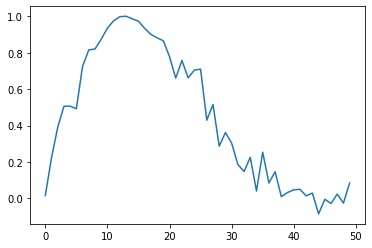

In [6]:
signal = generate_new_signal(generator)
plt.plot(signal)
plt.show()